<a href="https://colab.research.google.com/github/LeaDiGiovanni/LeaPython/blob/main/EfficientFrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [22]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [23]:
tickers_np

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL',
       'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
       'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP',
       'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
       'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET',
       'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
       'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH',
       'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO',
       'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR',
       'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE',
       'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR',
       'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C',
       'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG',
       'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', '

In [37]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY','GOOG','TSLA','UBS','AMZN','FOX','NVDA']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY,GOOG,TSLA,UBS,AMZN,FOX,NVDA
Date,,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,122.357430,43.422455,79.273933,71.589775,195.263611,123.702286,300.291473,68.046204,28.684000,10.959760,94.900497,33.627308,5.972161
2020-01-03 00:00:00-05:00,121.303787,43.040665,78.307526,70.910263,194.938431,123.290604,298.017731,67.712288,29.534000,10.781620,93.748497,33.295280,5.876571
2020-01-06 00:00:00-05:00,121.419334,43.313366,78.717796,71.469879,193.665421,123.749077,299.154663,69.381874,30.102667,10.756173,95.143997,33.216873,5.901215
2020-01-07 00:00:00-05:00,120.929886,43.022491,78.280174,71.062141,189.484192,123.982948,298.313507,69.338577,31.270666,10.976725,95.343002,33.636536,5.972660
2020-01-08 00:00:00-05:00,122.785683,42.958851,78.599281,71.565796,189.855881,125.105751,299.903381,69.884995,32.809334,11.120932,94.598503,33.590412,5.983861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433,195.766968,430.600006,30.290001,225.059998,46.370796,139.657150
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582,197.345184,462.279999,30.549999,229.050003,46.908024,140.207108
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499,196.875717,454.130005,30.639999,227.050003,46.679199,139.917130


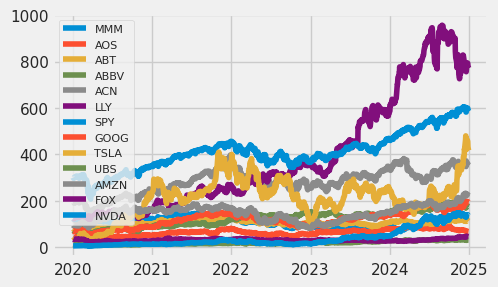

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [39]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY,GOOG,TSLA,UBS,AMZN,FOX,NVDA
Date,,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008648,-0.008831,-0.012266,-0.009537,-0.001667,-0.003334,-0.007601,-0.004919,0.029203,-0.016388,-0.012213,-0.009923,-0.016135
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005226,0.007861,-0.006552,0.003712,0.003808,0.024358,0.019072,-0.002363,0.014776,-0.002358,0.004185
2020-01-07 00:00:00-05:00,-0.004039,-0.006738,-0.005575,-0.005721,-0.021826,0.001888,-0.002816,-0.000624,0.038067,0.020297,0.002089,0.012555,0.012034
2020-01-08 00:00:00-05:00,0.015229,-0.001480,0.004068,0.007063,0.001960,0.009015,0.005315,0.007850,0.048033,0.013052,-0.007839,-0.001372,0.001874


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [40]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY,GOOG,TSLA,UBS,AMZN,FOX,NVDA
MMM,0.084735,0.044532,0.029603,0.022298,0.039522,0.019445,0.034763,0.032060,0.032619,0.047273,0.024800,0.037563,0.041574
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544,0.034097,0.044637,0.047235,0.031617,0.034876,0.052395
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485,0.034754,0.036339,0.033287,0.031612,0.025656,0.049710
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031755,0.024058,0.022005,0.019070,0.024291,0.014108,0.019404,0.025390
ACN,0.039522,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499,0.055033,0.066733,0.053980,0.051489,0.039057,0.080476
LLY,0.019445,0.020330,0.030728,0.031755,0.029804,0.102445,0.028939,0.028246,0.017514,0.022488,0.027373,0.013200,0.046686
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097,0.050473,0.071691,0.049488,0.048635,0.036559,0.078563
GOOG,0.032060,0.034097,0.034754,0.022005,0.055033,0.028246,0.050473,0.104187,0.087530,0.048996,0.075570,0.033035,0.102746
TSLA,0.032619,0.044637,0.036339,0.019070,0.066733,0.017514,0.071691,0.087530,0.445081,0.074509,0.104278,0.057331,0.169451
UBS,0.047273,0.047235,0.033287,0.024291,0.053980,0.022488,0.049488,0.048996,0.074509,0.118199,0.043646,0.052774,0.075172


### Correlation measures the **degree** to which two securities move in relation to each other.

In [41]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY,GOOG,TSLA,UBS,AMZN,FOX,NVDA
MMM,250.000000,127.451133,97.678319,76.986503,116.045130,52.176050,142.174984,85.304252,41.991383,118.091306,59.471414,99.305243,67.000096
AOS,127.451133,250.000000,88.006992,65.666634,116.912945,52.917332,144.982681,88.006306,55.740986,114.461423,73.549878,89.440210,81.909462
ABT,97.678319,88.006992,250.000000,111.538736,130.531469,92.210962,153.158635,103.416794,52.317251,92.995396,84.780558,75.857411,89.595245
ABBV,76.986503,65.666634,111.538736,250.000000,89.446131,99.711637,115.146343,68.517575,28.728656,71.011729,39.592932,60.030677,47.883499
ACN,116.045130,116.912945,130.531469,89.446131,250.000000,79.588214,193.334762,145.727017,85.496324,134.198593,122.884167,102.762005,129.073052
LLY,52.176050,52.917332,92.210962,99.711637,79.588214,250.000000,107.640147,68.351011,20.504562,51.089722,59.700612,31.737678,68.426545
SPY,142.174984,144.982681,153.158635,115.146343,193.334762,107.640147,250.000000,186.160530,127.932976,171.369820,161.674933,133.979639,175.508664
GOOG,85.304252,88.006306,103.416794,68.517575,145.727017,68.351011,186.160530,250.000000,101.617872,110.378644,163.430737,78.760665,149.328135
TSLA,41.991383,55.740986,52.317251,28.728656,85.496324,20.504562,127.932976,101.617872,250.000000,81.212199,109.110769,66.132328,119.153616
UBS,118.091306,114.461423,92.995396,71.011729,134.198593,51.089722,171.369820,110.378644,81.212199,250.000000,88.619312,118.130257,102.572423


In [42]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [49]:
w = {'MMM': 0.5, 'LLY': 0.5, 'AOS': 0.5, 'ABT': 0.5, 'ABBV': 0.1, 'ACN': 0.2, 'SPY': 0.5, 'GOOG': 0.5, 'AMZN': 0.5, 'FOX': 0.5, 'NVDA': 0.1, 'TSLA': 0.5, 'UBS': 0.2}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(1.2648248552650223)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [50]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-50-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045164
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179
GOOG,0.306370
TSLA,0.386076
UBS,0.270757


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [52]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(1.2367518136737552)

## Calculate the volatility, or the annualized standard deviation.

In [53]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300199
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075
GOOG,0.322909
TSLA,0.667409
UBS,0.343938


In [54]:
data.std()*np.sqrt(250)

,0
MMM,0.291093
AOS,0.300080
ABT,0.260281
ABBV,0.248745
ACN,0.292493
LLY,0.320070
SPY,0.209992
GOOG,0.322781
TSLA,0.667144
UBS,0.343801


## Create a table for returns and volatility of assets.

In [55]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045164,0.291209
AOS,0.144306,0.300199
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075
GOOG,0.306370,0.322909
TSLA,0.386076,0.667409
UBS,0.270757,0.343938


In [57]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [59]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [60]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [18]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.255191,3.219485,0.168192,0.124846,0.044708,0.246228,0.048226,0.354350,0.013451
1,0.156100,3.195397,0.062025,0.336813,0.145730,0.159608,0.136396,0.070337,0.089091
2,0.171509,3.184874,0.053072,0.220738,0.052963,0.253982,0.276260,0.070251,0.072734
3,0.138199,3.322833,0.277766,0.360010,0.119903,0.114617,0.012431,0.083425,0.031848
4,0.113563,3.166858,0.055851,0.214400,0.372651,0.198003,0.095544,0.010181,0.053369


<Axes: xlabel='Volatility', ylabel='Returns'>

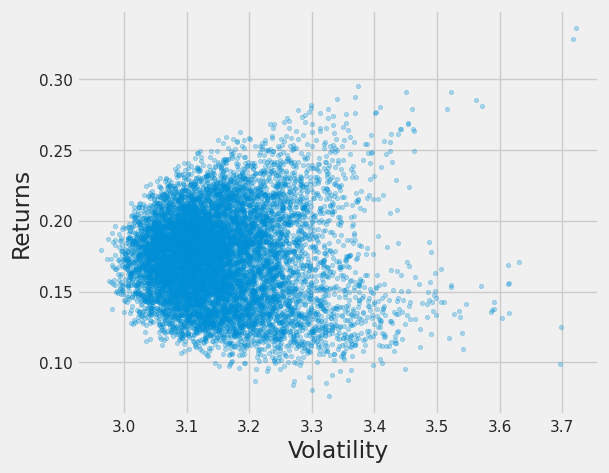

In [19]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [80]:
tickers = ['GOOG','TSLA','UBS','AMZN','FOX','NVDA']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,GOOG,TSLA,UBS,AMZN,FOX,NVDA
Date,,,,,,
2020-01-02 00:00:00-05:00,68.046204,28.684000,10.959760,94.900497,33.627308,5.972161
2020-01-03 00:00:00-05:00,67.712288,29.534000,10.781620,93.748497,33.295280,5.876571
2020-01-06 00:00:00-05:00,69.381874,30.102667,10.756173,95.143997,33.216873,5.901215
2020-01-07 00:00:00-05:00,69.338577,31.270666,10.976725,95.343002,33.636536,5.972660
2020-01-08 00:00:00-05:00,69.884995,32.809334,11.120932,94.598503,33.590412,5.983861
...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,195.766968,430.600006,30.290001,225.059998,46.370796,139.657150
2024-12-24 00:00:00-05:00,197.345184,462.279999,30.549999,229.050003,46.908024,140.207108
2024-12-26 00:00:00-05:00,196.875717,454.130005,30.639999,227.050003,46.679199,139.917130


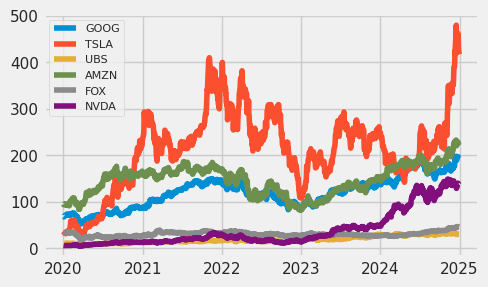

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [82]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(10)

,GOOG,TSLA,UBS,AMZN,FOX,NVDA
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.004919,0.029203,-0.016388,-0.012213,-0.009923,-0.016135
2020-01-06 00:00:00-05:00,0.024358,0.019072,-0.002363,0.014776,-0.002358,0.004185
2020-01-07 00:00:00-05:00,-0.000624,0.038067,0.020297,0.002089,0.012555,0.012034
2020-01-08 00:00:00-05:00,0.007850,0.048033,0.013052,-0.007839,-0.001372,0.001874
2020-01-09 00:00:00-05:00,0.010984,-0.022189,0.002286,0.004788,0.002194,0.010923
2020-01-10 00:00:00-05:00,0.006949,-0.006649,-0.012252,-0.009455,-0.011435,0.005335
2020-01-13 00:00:00-05:00,0.006622,0.093207,0.008439,0.004313,0.005940,0.030871
2020-01-14 00:00:00-05:00,-0.005819,0.024578,0.003813,-0.011626,0.006590,-0.018828


In [83]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,GOOG,TSLA,UBS,AMZN,FOX,NVDA
GOOG,0.104187,0.087530,0.048996,0.075570,0.033035,0.102746
TSLA,0.087530,0.445081,0.074509,0.104278,0.057331,0.169451
UBS,0.048996,0.074509,0.118199,0.043646,0.052774,0.075172
AMZN,0.075570,0.104278,0.043646,0.128260,0.024689,0.111974
FOX,0.033035,0.057331,0.052774,0.024689,0.105533,0.044549
NVDA,0.102746,0.169451,0.075172,0.111974,0.044549,0.283998


In [84]:
corr_matrix =data.corr() * 250
corr_matrix

,GOOG,TSLA,UBS,AMZN,FOX,NVDA
GOOG,250.000000,101.617872,110.378644,163.430737,78.760665,149.328135
TSLA,101.617872,250.000000,81.212199,109.110769,66.132328,119.153616
UBS,110.378644,81.212199,250.000000,88.619312,118.130257,102.572423
AMZN,163.430737,109.110769,88.619312,250.000000,53.052655,146.674216
FOX,78.760665,66.132328,118.130257,53.052655,250.000000,64.332121
NVDA,149.328135,119.153616,102.572423,146.674216,64.332121,250.000000


In [85]:
w = {'GOOG': 0.5, 'AMZN': 0.5, 'FOX': 0.5, 'NVDA': 0.1, 'TSLA': 0.5, 'UBS': 0.2}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.4844133647849844)

In [86]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-86-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
GOOG,0.306370
TSLA,0.386076
UBS,0.270757
AMZN,0.198230
FOX,0.181692
NVDA,1.229869


In [87]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.838244561094369)

In [88]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
GOOG,0.322909
TSLA,0.667409
UBS,0.343938
AMZN,0.358277
FOX,0.324988
NVDA,0.533126


In [89]:
data.std()*np.sqrt(250)

,0
GOOG,0.322781
TSLA,0.667144
UBS,0.343801
AMZN,0.358135
FOX,0.324858
NVDA,0.532915


In [90]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
GOOG,0.306370,0.322909
TSLA,0.386076,0.667409
UBS,0.270757,0.343938
AMZN,0.198230,0.358277
FOX,0.181692,0.324988
NVDA,1.229869,0.533126


In [92]:
p_ret = []
p_vol = []
p_weights = []
num_assets = len(df.columns)
num_portfolios = 10000

In [93]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)

In [94]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [95]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,GOOG weight,TSLA weight,UBS weight,AMZN weight,FOX weight,NVDA weight
0,0.364916,4.427894,0.356104,0.060423,0.302621,0.103315,0.084219,0.093319
1,0.508190,5.343252,0.152003,0.224419,0.051459,0.110927,0.217663,0.243529
2,0.383995,4.532942,0.381333,0.000786,0.303465,0.187893,0.007780,0.118742
3,0.302914,4.461543,0.021294,0.119051,0.307550,0.304890,0.188255,0.058960
4,0.299278,5.190702,0.286585,0.316463,0.077448,0.042247,0.268119,0.009138


<Axes: xlabel='Volatility', ylabel='Returns'>

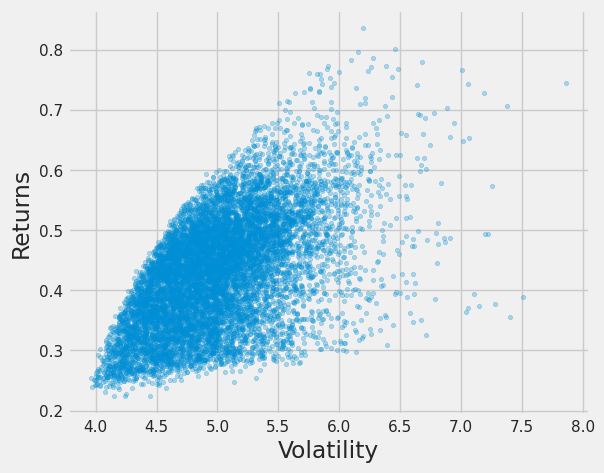

In [96]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])